In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# creating the data frame
df=pd.read_csv("/Zomato-data-.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
# Convert the rate column into float and remove the denominator
def handle_rate(rate):
    value=str(rate).split("/")
    value=value[0]
    return float(value)
df["rate"]=df['rate'].apply(handle_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
# THERE IS NO NULL VALUE


Text(0.5, 0, 'Type of restaurants')

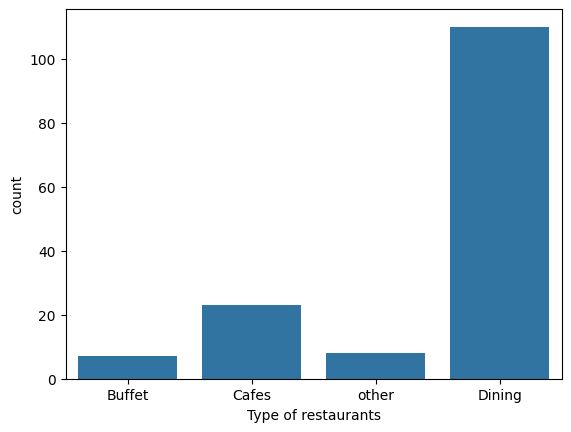

In [ ]:
# Exploring the listed_in(type)column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurants")

Text(0, 0.5, 'Total votes')

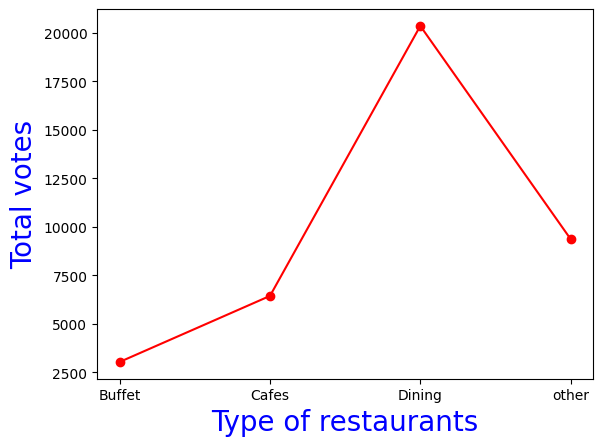

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='red',marker='o')
plt.xlabel("Type of restaurants",c="blue",size=20)
plt.ylabel("Total votes",c="blue",size=20)

In [ ]:
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
print(restaurant_with_max_votes)


38    Empire Restaurant
Name: name, dtype: object


Text(0.5, 0, 'Online order')

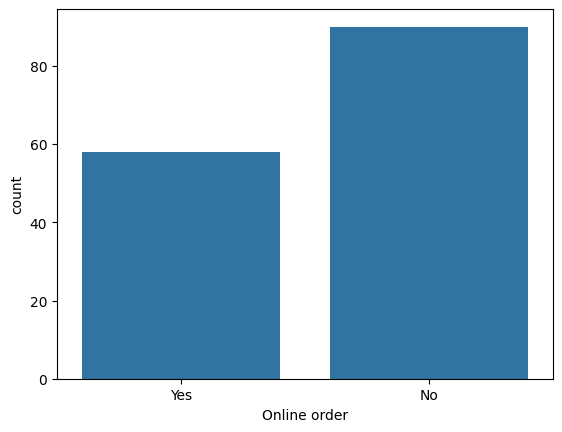

In [ ]:
sns.countplot(x=df['online_order'])
plt.xlabel("Online order")

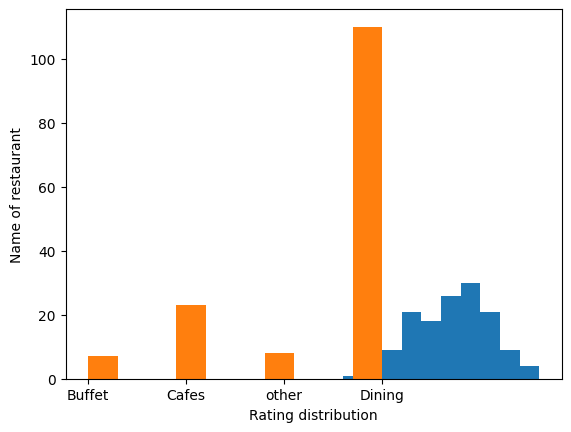

In [ ]:
plt.hist(df['rate'],bins=10)
plt.hist(df['listed_in(type)'],bins=10)
plt.xlabel("Rating distribution")
plt.ylabel("Name of restaurant")
plt.show()
plt.show()

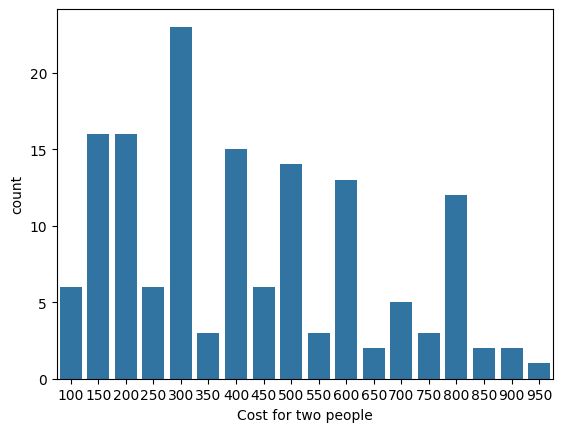

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("Cost for two people")
plt.show()

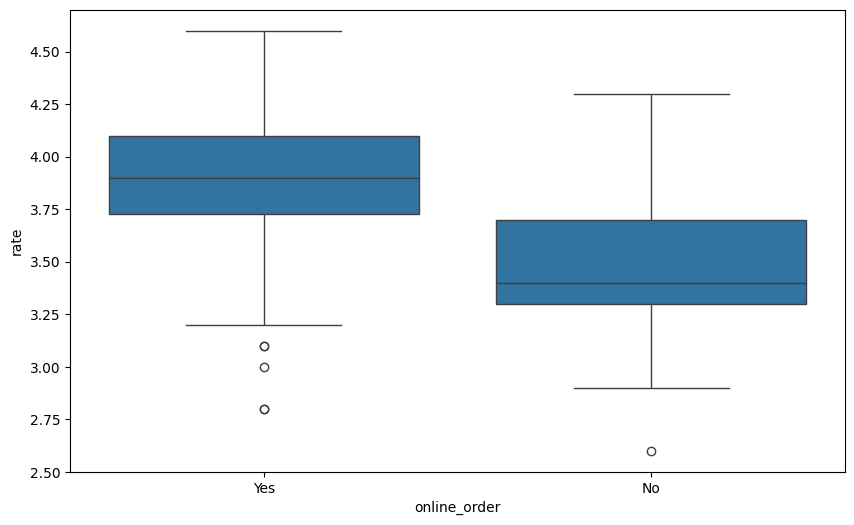

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="online_order",y="rate",data=df)
plt.show()

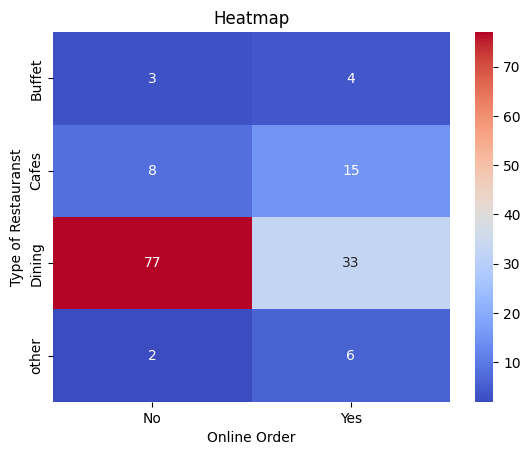

In [ ]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='coolwarm',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Type of Restauranst')
plt.show()